Riadh Tlili/Aziz Mejri/Wejdene jouadi/Ayoub Saad

In [56]:
import pandas as pd
df=pd.read_csv('C:/Users/riadh/OneDrive/Desktop/Projects/pythonfundemantals/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [58]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [59]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [60]:
df.duplicated().sum()

0

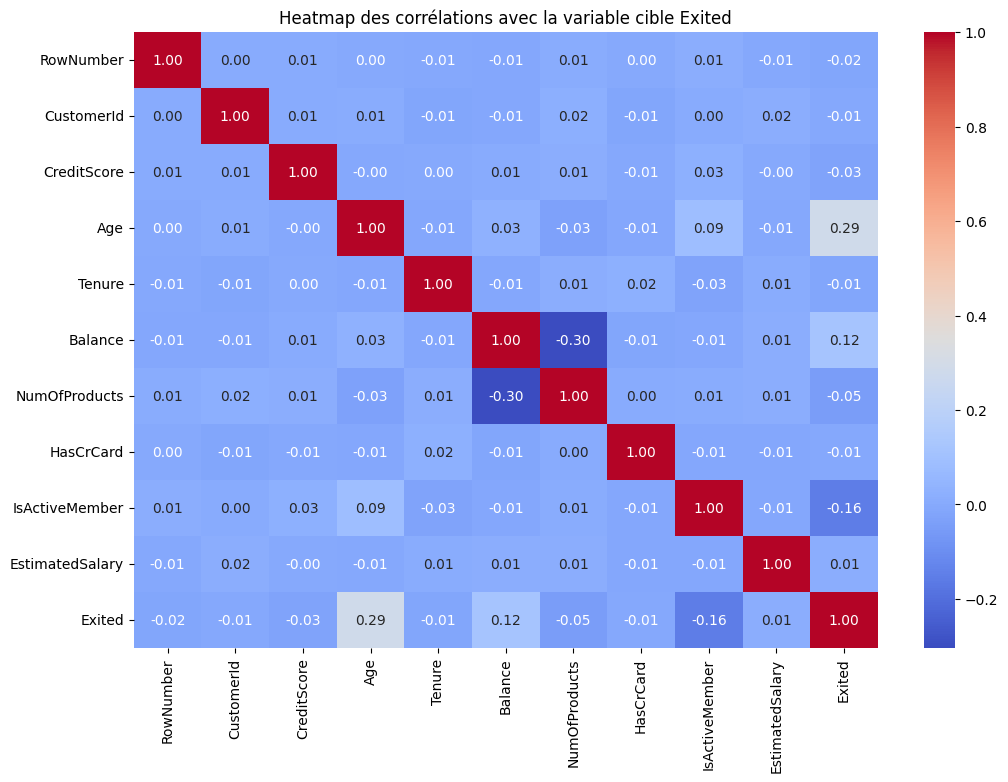

In [61]:
num_df = df.select_dtypes(include=['int64', 'float64'])

# Matrice des corrélations
corr = num_df.corr()

# Plot de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations avec la variable cible Exited")
plt.show()

2-eda

In [62]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [63]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)


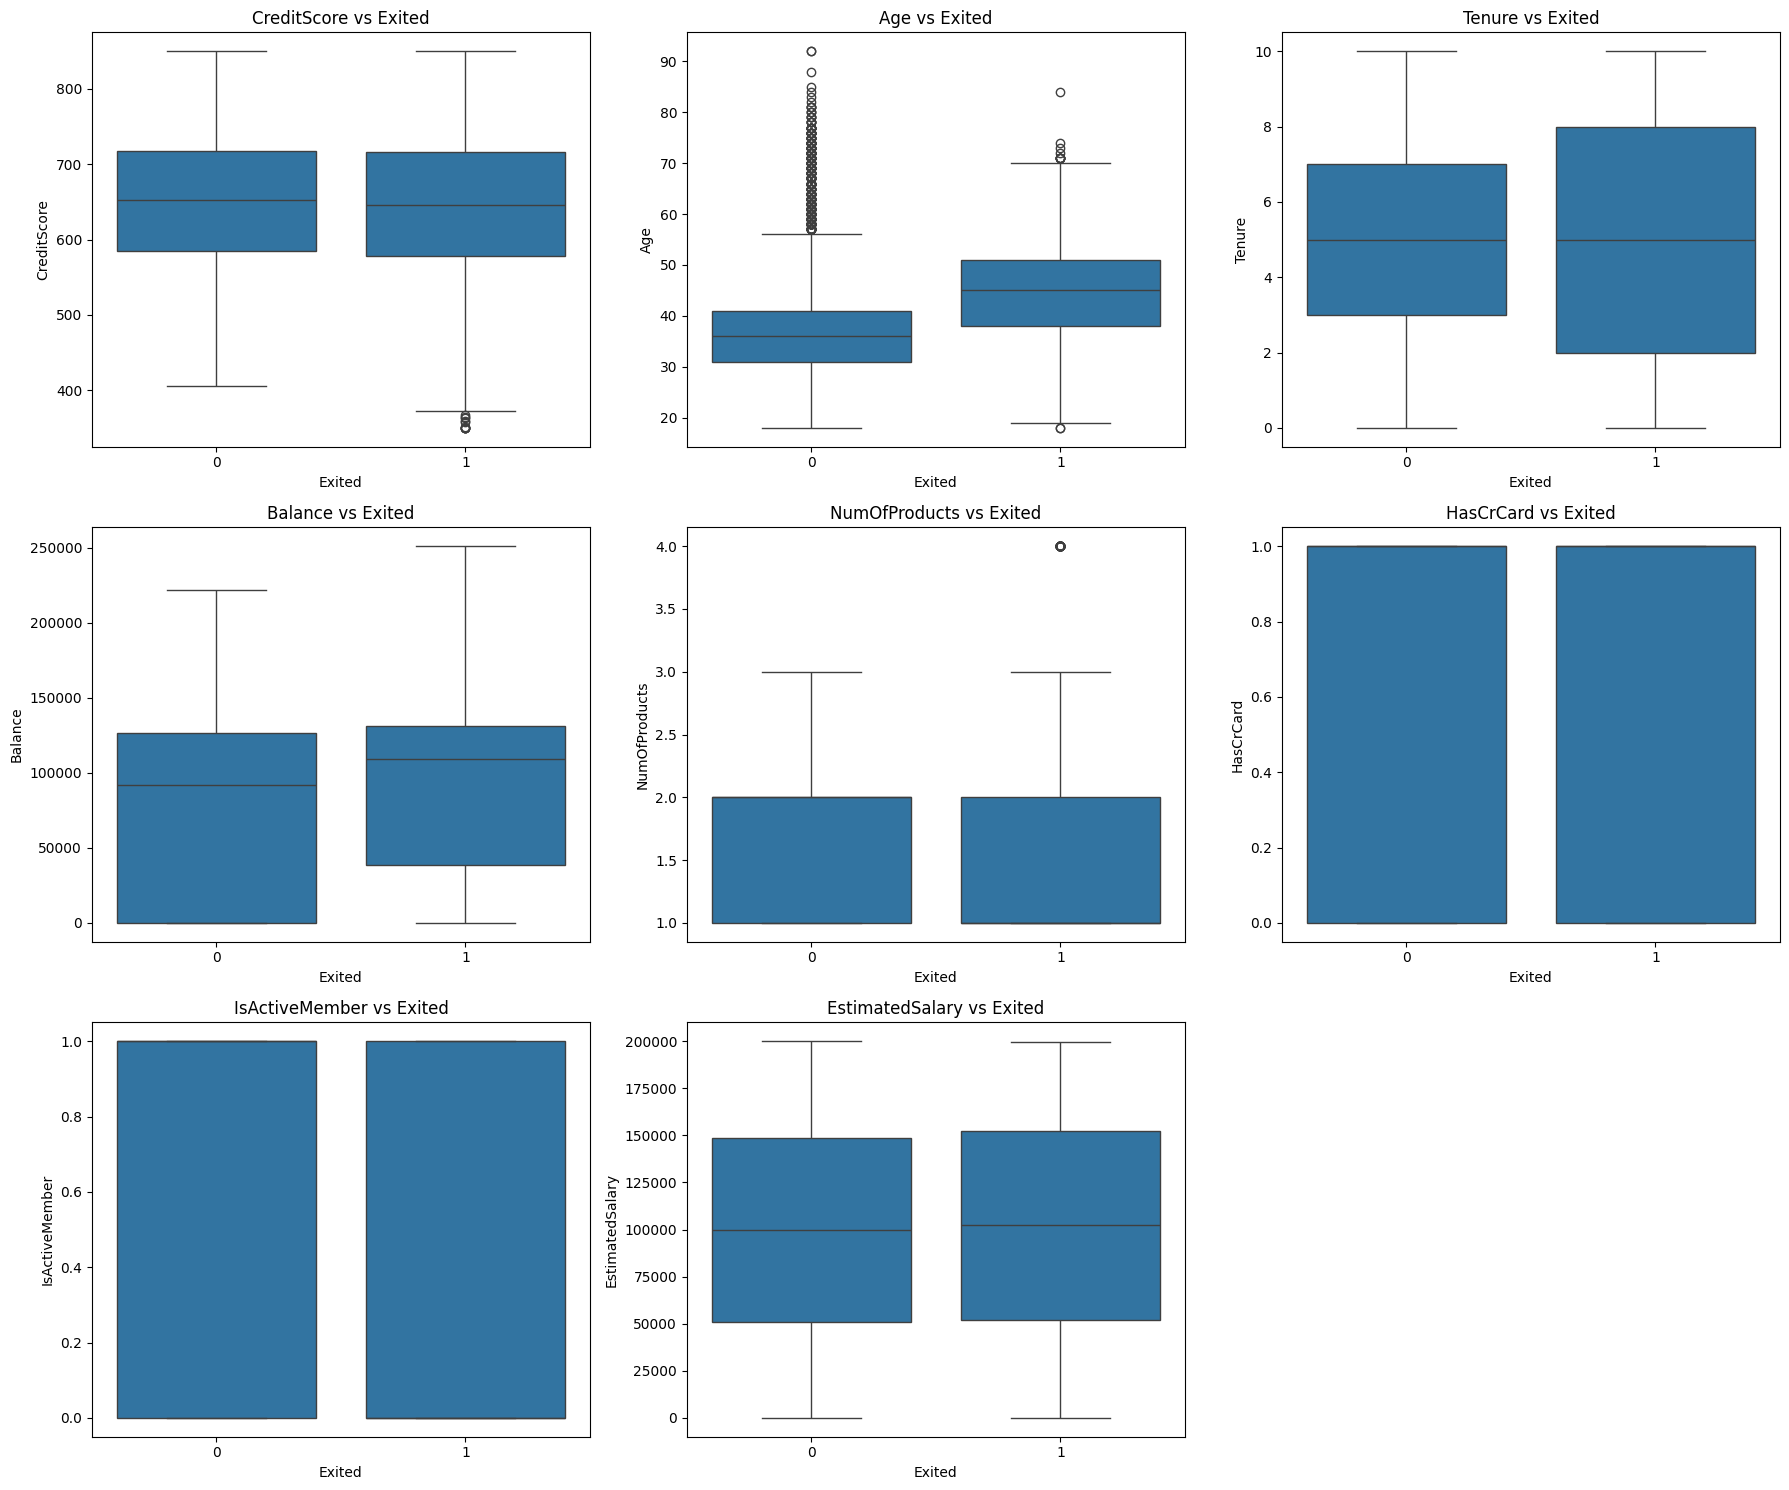

In [65]:
import math

# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = [col for col in num_cols if col != "Exited"]

# Définir la grille
n = len(num_cols)
cols = 3  # nombre de colonnes dans la grille
rows = math.ceil(n / cols)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df["Exited"], y=df[col])
    plt.title(f"{col} vs Exited")
    plt.xlabel("Exited")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

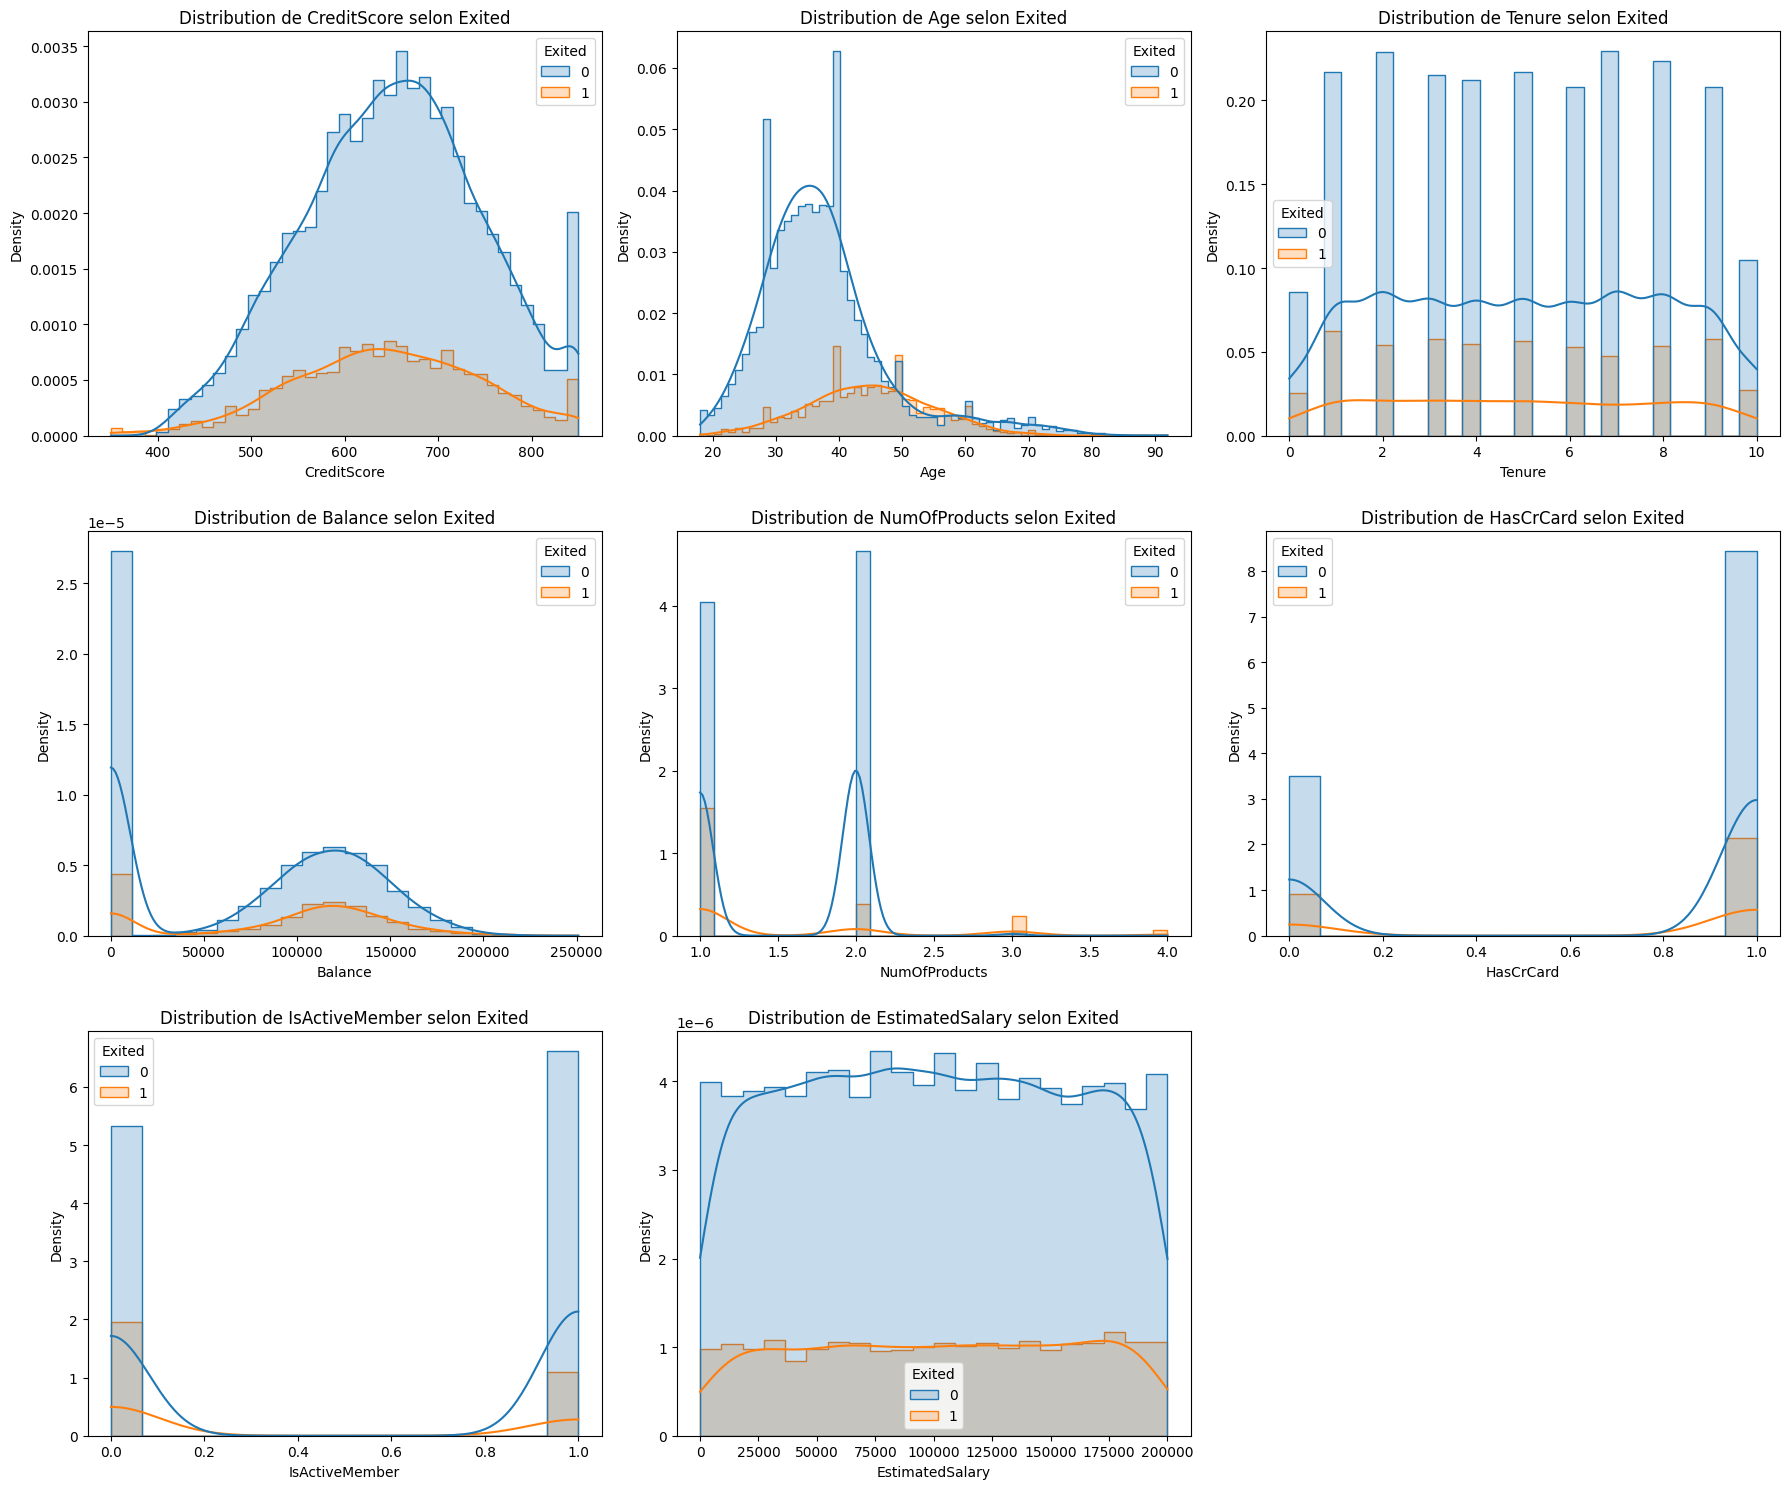

In [66]:
import math

# Colonnes numériques
num_colse = df.select_dtypes(include=['int64', 'float64']).columns
num_colse = [col for col in num_colse if col != "Exited"]

n = len(num_colse)
cols = 3   # nombre de colonnes de la grille
rows = math.ceil(n / cols)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(num_colse, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=df, x=col, hue="Exited",
                 kde=True, element="step", stat="density")
    plt.title(f"Distribution de {col} selon Exited")

plt.tight_layout()
plt.show()

In [46]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,male,42,3,75075.31,2,1,0,92888.52,1


In [67]:
# Clean the Gender column first
df["Gender"] = df["Gender"].str.strip().str.lower()

In [68]:
df["Gender"].unique()


array(['female', 'male'], dtype=object)

In [69]:
df["Gender"] = df["Gender"].map({"female": 0, "male": 1})

In [70]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [71]:
df["Geography"] = df["Geography"].map({
    "France": 1,
    "Germany": 2,
    "Spain": 3
})

In [73]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,3,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Séparer X / y
X = df.drop(columns=["Exited","Surname"])
y = df["Exited"]

# 2) Split (stratifié pour conserver le taux de churn)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Colonnes numériques candidates à la normalisation
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# Exclure les colonnes déjà binaires (0/1) pour éviter de casser l'interprétation
num_to_scale = [c for c in num_cols if X_train[c].nunique() > 2]

# 4) Standardisation (fit sur train, transform sur train et test)
scaler = StandardScaler()
X_train[num_to_scale] = scaler.fit_transform(X_train[num_to_scale])
X_test[num_to_scale]  = scaler.transform(X_test[num_to_scale])

# Vérification rapide
print(num_to_scale)
X_train.head()


['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,1.058568,-0.905933,1,1.715086,0.684723,-1.226059,-0.910256,1,0,1.042084
8392,0.913626,0.300168,1,-0.659935,-0.696202,0.413288,-0.910256,1,0,-0.623556
5006,1.079274,0.300168,0,-0.184931,-1.731895,0.601687,0.808830,1,1,0.308128
4117,-0.929207,-0.905933,1,-0.184931,-0.005739,-1.226059,0.808830,1,0,-0.290199
7182,0.427035,0.300168,1,0.955079,0.339492,0.548318,0.808830,0,1,0.135042


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ============================
# LOGISTIC REGRESSION
# ============================

# Hyperparameter grid
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "liblinear"],
    "penalty": ["l2"]
}

# Base model
log_reg = LogisticRegression(
    max_iter=2000,
    class_weight="balanced"   # helps with churn (class imbalance)
)

# GridSearchCV
gs_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

# Train model
gs_lr.fit(X_train, y_train)

print("\n===== LOGISTIC REGRESSION RESULTS =====")
print("Best parameters:", gs_lr.best_params_)

# Predictions
y_pred_lr = gs_lr.predict(X_test)
y_score_lr = gs_lr.predict_proba(X_test)[:, 1]

print("\nAUC:", roc_auc_score(y_test, y_score_lr))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr))


Fitting 5 folds for each of 8 candidates, totalling 40 fits

===== LOGISTIC REGRESSION RESULTS =====
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

AUC: 0.774052943544469

Confusion matrix:
 [[1140  453]
 [ 119  288]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



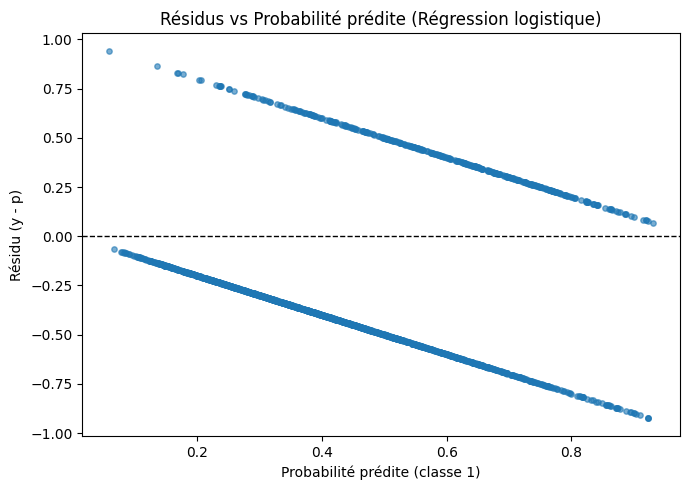

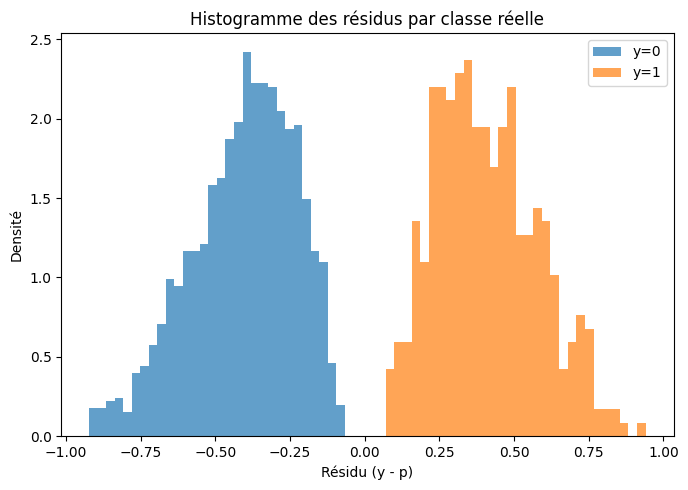

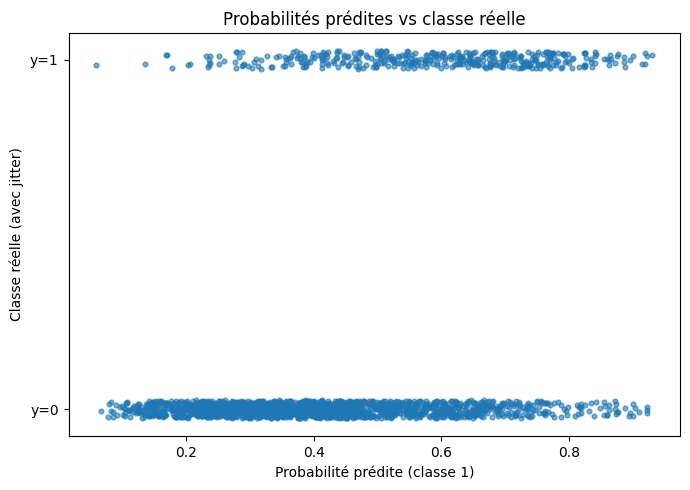

Résumé des résidus (y - p):
 count    2000.000000
mean       -0.241066
std         0.372016
min        -0.922974
25%        -0.475933
50%        -0.332473
75%        -0.159204
max         0.940503
dtype: float64


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assure qu'on a des numpy arrays
y_true = np.asarray(y_test)
p_hat  = np.asarray(y_score_lr)  # probas de la classe 1
resid  = y_true - p_hat          # résidu "probabiliste"

# 1) Résidus vs probabilité prédite
plt.figure(figsize=(7,5))
plt.scatter(p_hat, resid, s=15, alpha=0.6)
plt.axhline(0, ls="--", lw=1, color="k")
plt.xlabel("Probabilité prédite (classe 1)")
plt.ylabel("Résidu (y - p)")
plt.title("Résidus vs Probabilité prédite (Régression logistique)")
plt.tight_layout()
plt.show()

# 2) Histogramme des résidus par classe réelle
plt.figure(figsize=(7,5))
plt.hist(resid[y_true==0], bins=30, alpha=0.7, label="y=0", density=True)
plt.hist(resid[y_true==1], bins=30, alpha=0.7, label="y=1", density=True)
plt.xlabel("Résidu (y - p)")
plt.ylabel("Densité")
plt.title("Histogramme des résidus par classe réelle")
plt.legend()
plt.tight_layout()
plt.show()

# 3) Probabilités prédites par classe réelle (visualisation de la séparation)
plt.figure(figsize=(7,5))
# léger jitter vertical pour mieux voir les points
y_jitter = y_true + (np.random.rand(len(y_true)) - 0.5) * 0.05
plt.scatter(p_hat, y_jitter, s=12, alpha=0.6)
plt.yticks([0,1], ["y=0","y=1"])
plt.xlabel("Probabilité prédite (classe 1)")
plt.ylabel("Classe réelle (avec jitter)")
plt.title("Probabilités prédites vs classe réelle")
plt.tight_layout()
plt.show()

# Optionnel : tableau de résumé des résidus
summary = pd.Series(resid).describe()
print("Résumé des résidus (y - p):\n", summary)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ============================================
# RANDOM FOREST + GRIDSEARCHCV
# ============================================

# Hyperparameter grid
param_grid_rf = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 15],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

# Base Random Forest model
rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"  # churn imbalance handling
)

# GridSearch
gs_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

# Train
gs_rf.fit(X_train, y_train)

print("\n===== RANDOM FOREST RESULTS =====")
print("Best parameters:", gs_rf.best_params_)

# Predictions
y_pred_rf = gs_rf.predict(X_test)
y_score_rf = gs_rf.predict_proba(X_test)[:, 1]

print("\nAUC:", roc_auc_score(y_test, y_score_rf))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits

===== RANDOM FOREST RESULTS =====
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}

AUC: 0.8581971802310784

Confusion matrix:
 [[1406  187]
 [ 135  272]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1593
           1       0.59      0.67      0.63       407

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



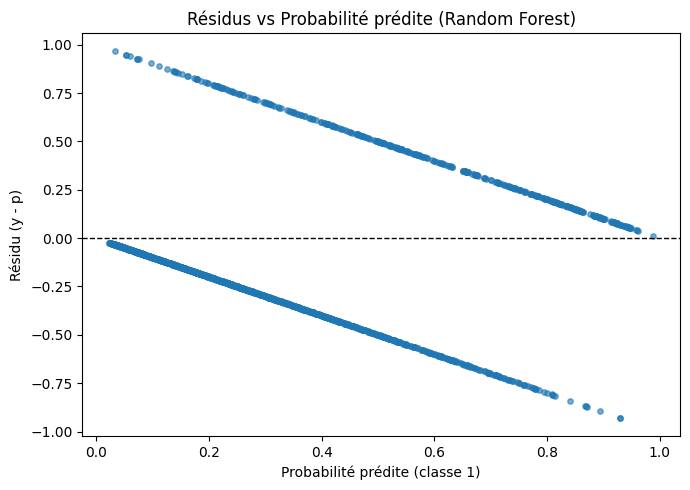

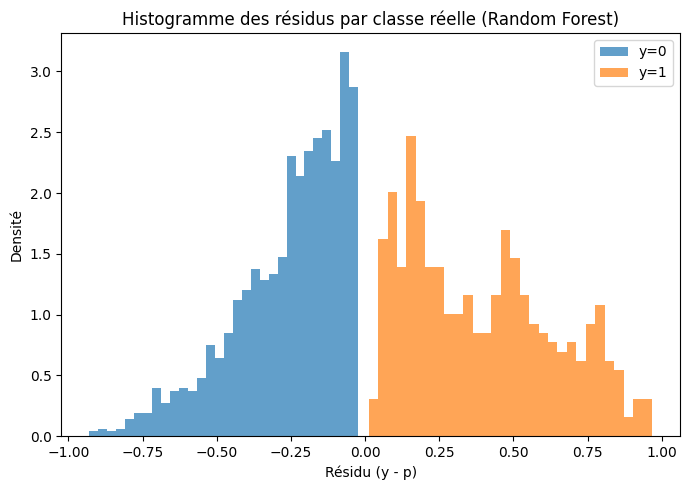

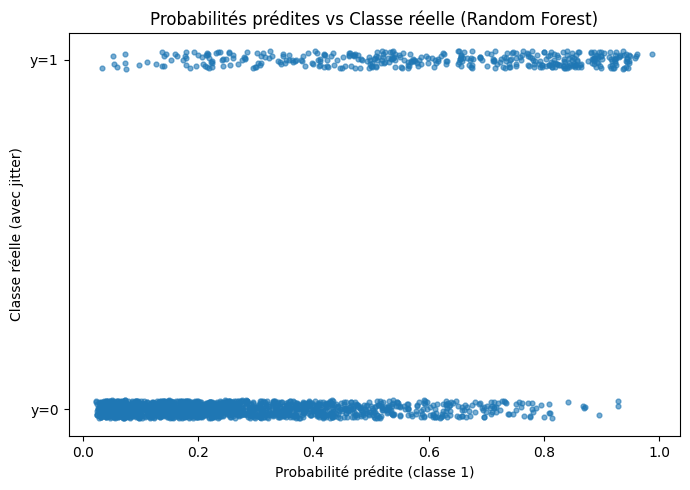

Résumé des résidus (y - p):
 count    2000.000000
mean       -0.126374
std         0.329529
min        -0.929217
25%        -0.320179
50%        -0.162314
75%        -0.045280
max         0.966541
dtype: float64


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convertir en numpy arrays
y_true = np.asarray(y_test)
p_hat  = np.asarray(y_score_rf)   # probas de la classe 1 du Random Forest
resid  = y_true - p_hat           # résidu probabiliste

# ===============================
# 1) Résidus vs probabilité prédite
# ===============================
plt.figure(figsize=(7,5))
plt.scatter(p_hat, resid, s=15, alpha=0.6)
plt.axhline(0, ls="--", lw=1, color="k")
plt.xlabel("Probabilité prédite (classe 1)")
plt.ylabel("Résidu (y - p)")
plt.title("Résidus vs Probabilité prédite (Random Forest)")
plt.tight_layout()
plt.show()

# ===============================
# 2) Histogramme des résidus par classe
# ===============================
plt.figure(figsize=(7,5))
plt.hist(resid[y_true==0], bins=30, alpha=0.7, label="y=0", density=True)
plt.hist(resid[y_true==1], bins=30, alpha=0.7, label="y=1", density=True)
plt.xlabel("Résidu (y - p)")
plt.ylabel("Densité")
plt.title("Histogramme des résidus par classe réelle (Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()

# ===============================
# 3) Probabilités prédites vs classe réelle
# ===============================
plt.figure(figsize=(7,5))
y_jitter = y_true + (np.random.rand(len(y_true)) - 0.5) * 0.05
plt.scatter(p_hat, y_jitter, s=12, alpha=0.6)
plt.yticks([0,1], ["y=0","y=1"])
plt.xlabel("Probabilité prédite (classe 1)")
plt.ylabel("Classe réelle (avec jitter)")
plt.title("Probabilités prédites vs Classe réelle (Random Forest)")
plt.tight_layout()
plt.show()

# ===============================
# 4) Résumé statistique des résidus
# ===============================
summary = pd.Series(resid).describe()
print("Résumé des résidus (y - p):\n", summary)


In [80]:
print("\n==== ROC-AUC COMPARISON ====")
print("Logistic Regression:", roc_auc_score(y_test, y_score_lr))
print("Random Forest:", roc_auc_score(y_test, y_score_rf))



==== ROC-AUC COMPARISON ====
Logistic Regression: 0.774052943544469
Random Forest: 0.8581971802310784


                 Model   AUC-ROC  Accuracy  Precision (class 1)  \
0  Logistic Regression  0.774053     0.714             0.388664   
1        Random Forest  0.858197     0.839             0.592593   

   Recall (class 1)  F1-score (class 1)  
0          0.707617            0.501742  
1          0.668305            0.628176  


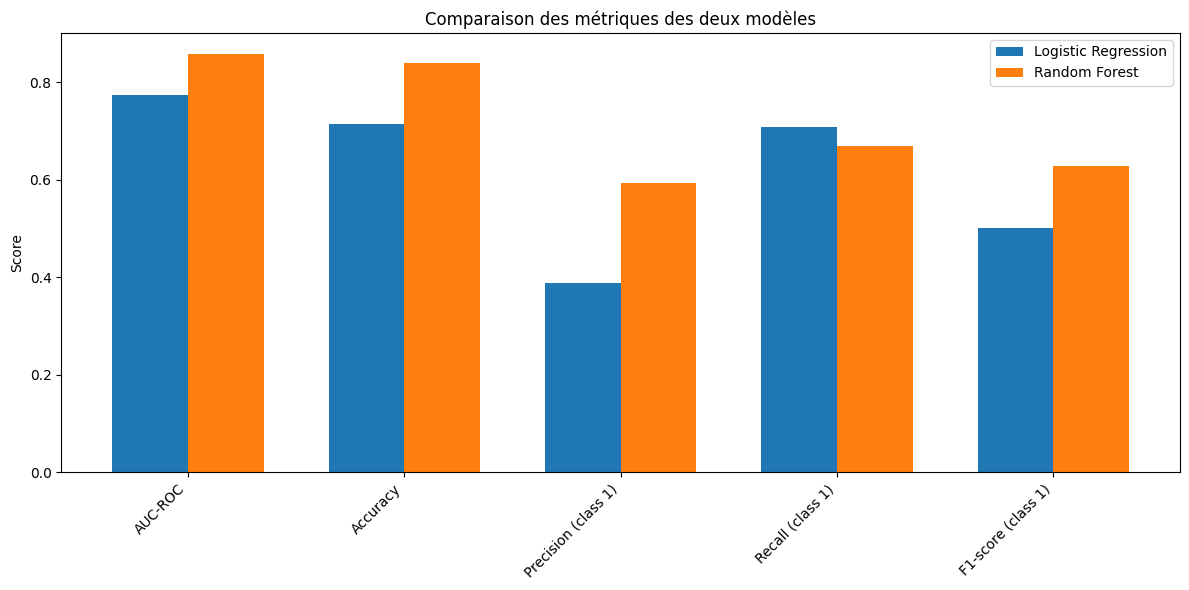

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ===============================
# 1) Build metrics dataframe
# ===============================

df_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "AUC-ROC": [
        roc_auc_score(y_test, y_score_lr),
        roc_auc_score(y_test, y_score_rf)
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision (class 1)": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall (class 1)": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score (class 1)": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ]
})

print(df_metrics)

# ===============================
# 2) Grouped bar chart
# ===============================

plt.figure(figsize=(12, 6))

metrics = ["AUC-ROC", "Accuracy", "Precision (class 1)", "Recall (class 1)", "F1-score (class 1)"]
x = range(len(metrics))
width = 0.35

plt.bar([p - width/2 for p in x], df_metrics.loc[0, metrics], width, label="Logistic Regression")
plt.bar([p + width/2 for p in x], df_metrics.loc[1, metrics], width, label="Random Forest")

plt.xticks(x, metrics, rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Comparaison des métriques des deux modèles")
plt.legend()
plt.tight_layout()
plt.show()


In [81]:
import pandas as pd
import numpy as np

# Importance des variables
importances = gs_rf.best_estimator_.feature_importances_

# Associer les noms des colonnes
feature_names = X_train.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
3,Age,0.323729
6,NumOfProducts,0.214787
5,Balance,0.116805
9,EstimatedSalary,0.085183
0,CreditScore,0.081766
8,IsActiveMember,0.053792
4,Tenure,0.045927
1,Geography,0.044850
2,Gender,0.022311
7,HasCrCard,0.010851


In [91]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, roc_curve

# === 1) Probabilités prévues
proba = y_score_rf
y_true = np.asarray(y_test)

# === 2) Trouver le seuil optimal (F1)
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(y_true, (proba >= t).astype(int)) for t in thresholds]
best_t = thresholds[np.argmax(f1_scores)]

print("Seuil optimal (F1-score) =", best_t)

# === 3) prédictions avec ce seuil
y_pred_opt = (proba >= best_t).astype(int)

# === 4) Création du tableau final
results_df = pd.DataFrame({
    "proba_churn": proba,
    "churn_pred": y_pred_opt,
    "y_true": y_true
})

# Tri des clients à risque
results_df = results_df.sort_values("proba_churn", ascending=False)

# Affichage
results_df.head(15)


Seuil optimal (F1-score) = 0.49


,proba_churn,churn_pred,y_true
248,0.987832,1,1
1059,0.961710,1,1
338,0.959601,1,1
860,0.957754,1,1
1521,0.949489,1,1
639,0.948057,1,1
1507,0.947954,1,1
920,0.947215,1,1
501,0.945880,1,1
586,0.944789,1,1
